In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

In [2]:
ad=pd.read_csv('adult.csv',sep=',')
print(ad.head())

   age  workclass  fnlwgt     education  educational-num      marital-status  \
0   25    Private  226802          11th                7       Never-married   
1   38    Private   89814       HS-grad                9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm               12  Married-civ-spouse   
3   44    Private  160323  Some-college               10  Married-civ-spouse   
4   18          ?  103497  Some-college               10       Never-married   

          occupation relationship   race  gender  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4                  ?    Own-child  White  Female             0             0   

   hours-per-week native-country incom

In [3]:
print(ad.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
age                48842 non-null int64
workclass          48842 non-null object
fnlwgt             48842 non-null int64
education          48842 non-null object
educational-num    48842 non-null int64
marital-status     48842 non-null object
occupation         48842 non-null object
relationship       48842 non-null object
race               48842 non-null object
gender             48842 non-null object
capital-gain       48842 non-null int64
capital-loss       48842 non-null int64
hours-per-week     48842 non-null int64
native-country     48842 non-null object
income             48842 non-null object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB
None


In [4]:
print(ad.describe())

                age        fnlwgt  educational-num  capital-gain  \
count  48842.000000  4.884200e+04     48842.000000  48842.000000   
mean      38.643585  1.896641e+05        10.078089   1079.067626   
std       13.710510  1.056040e+05         2.570973   7452.019058   
min       17.000000  1.228500e+04         1.000000      0.000000   
25%       28.000000  1.175505e+05         9.000000      0.000000   
50%       37.000000  1.781445e+05        10.000000      0.000000   
75%       48.000000  2.376420e+05        12.000000      0.000000   
max       90.000000  1.490400e+06        16.000000  99999.000000   

       capital-loss  hours-per-week  
count  48842.000000    48842.000000  
mean      87.502314       40.422382  
std      403.004552       12.391444  
min        0.000000        1.000000  
25%        0.000000       40.000000  
50%        0.000000       40.000000  
75%        0.000000       45.000000  
max     4356.000000       99.000000  


In [5]:
ad=ad.drop(['fnlwgt','marital-status','relationship','race','gender','capital-gain','capital-loss'],axis=1)
print(ad['education'].astype('category').value_counts())

HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64


In [6]:
print(ad['hours-per-week'].astype('category').value_counts())
print(ad['workclass'].astype('category').value_counts())


40    22803
50     4246
45     2717
60     2177
35     1937
      ...  
87        1
69        1
79        1
94        1
82        1
Name: hours-per-week, Length: 96, dtype: int64
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64


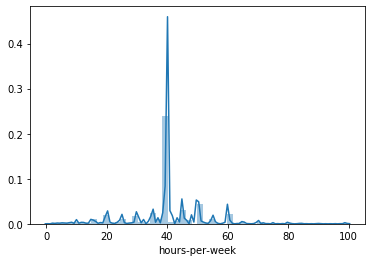

In [7]:
sbn.distplot(ad['hours-per-week'])
plt.show()


In [8]:
ad.loc[ad['income'] == '<=50K', 'income'] = 50
ad.loc[ad['income'] == '>50K', 'income'] = 40
print(ad['income'].astype('category').value_counts())


50    37155
40    11687
Name: income, dtype: int64


In [9]:
categorical = ad.select_dtypes(include=['object'])
print(categorical.head())


   workclass     education         occupation native-country
0    Private          11th  Machine-op-inspct  United-States
1    Private       HS-grad    Farming-fishing  United-States
2  Local-gov    Assoc-acdm    Protective-serv  United-States
3    Private  Some-college  Machine-op-inspct  United-States
4          ?  Some-college                  ?  United-States


In [10]:
numerical = ad.select_dtypes(include=['int64', 'float64'])
print(numerical.head())


   age  educational-num  hours-per-week  income
0   25                7              40      50
1   38                9              50      50
2   28               12              40      40
3   44               10              40      40
4   18               10              30      50


In [11]:
y = ad.pop('income')
X = numerical
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.25, random_state=0)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(12210, 4) (12210,)
(36632, 4) (36632,)


In [12]:
model = LogisticRegression()
print(model.fit(X_train, y_train))


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


In [15]:
y_test = model.predict(X_test)
y_train_pred = model.predict(X_train)
print(metrics.accuracy_score(y_test, y_train_pred))
print(metrics.classification_report(y_test, y_train_pred))



ValueError: Found input variables with inconsistent numbers of samples: [36632, 12210]